In [1]:
import sys
sys.path.insert(0, '../../')  
import math
import numpy as np
import matplotlib.pyplot as plt 
from gasp import process_data_for_gasp, create_data_mask, train_gasp, run_gasp, simulate_ssfp, simulate_ssfp_sampling, simulate_ssfp_simple, SSFPParams, responses, simulation, sampling

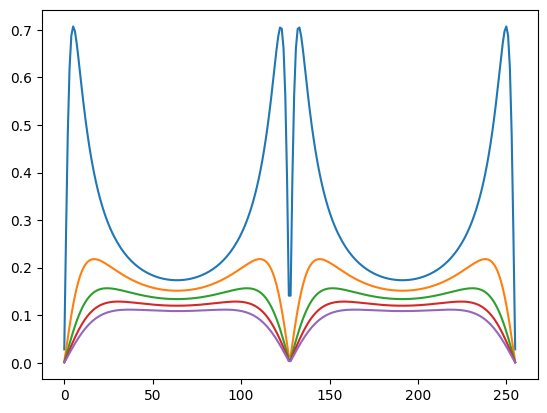

In [19]:
alpha = np.deg2rad(20)
N = 128
rMin = 0.5
rMax = 20
T1T2ratio = np.linspace(rMin, rMax, N)
n_points = 16
TRs = [5e-3, 10e-3, 20e-3]

TRs, PCs = sampling.grid_TR_sampling(n_points=n_points, TRs=TRs)
params = SSFPParams(n_points, alpha, TRs, PCs)
M = simulate_ssfp_simple(T1=1*T1T2ratio[0], T2 =1, params=params)
M2 = simulate_ssfp_simple(T1=1*T1T2ratio[31], T2 =1, params=params)
M3 = simulate_ssfp_simple(T1=1*T1T2ratio[63], T2 =1, params=params)
M4 = simulate_ssfp_simple(T1=1*T1T2ratio[95], T2 =1, params=params)
M5 = simulate_ssfp_simple(T1=1*T1T2ratio[127], T2 =1, params=params)


plt.plot(np.abs(M[0,:,0]))
plt.plot(np.abs(M2[0,:,0]))
plt.plot(np.abs(M3[0,:,0]))
plt.plot(np.abs(M4[0,:,0]))
plt.plot(np.abs(M5[0,:,0]))
plt.show()

In [3]:
M.shape

(1, 256, 16)

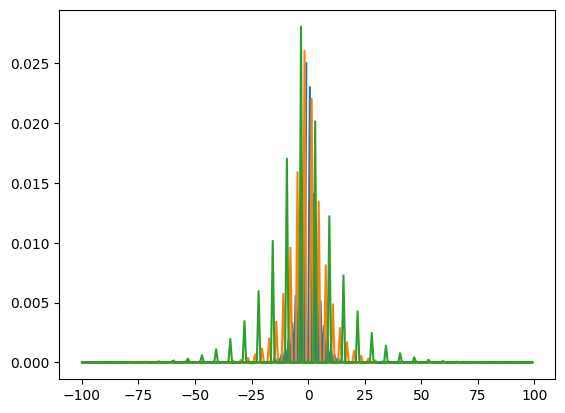

In [49]:
from scipy import signal
f, Pxx = signal.periodogram(M[0,:,0], fs=1/TRs[0], scaling='spectrum') # Original
plt.plot(f, Pxx, label='Original')
f, Pxx = signal.periodogram(M[0,:,1], fs=1/TRs[0], scaling='spectrum') # Original
plt.plot(f, Pxx, label='Original')
f, Pxx = signal.periodogram(M[0,:,2], fs=1/TRs[0], scaling='spectrum') # Original
plt.plot(f, Pxx, label='Original')

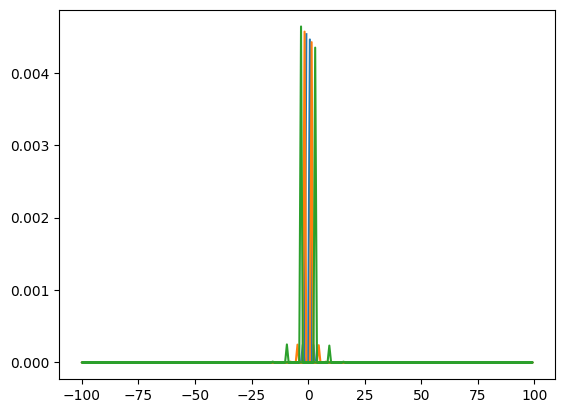

In [50]:
from scipy import signal
f, Pxx = signal.periodogram(M5[0,:,0], fs=1/TRs[0], scaling='spectrum') # Original
plt.plot(f, Pxx, label='Original')
f, Pxx = signal.periodogram(M5[0,:,1], fs=1/TRs[0], scaling='spectrum') # Original
plt.plot(f, Pxx, label='Original')
f, Pxx = signal.periodogram(M5[0,:,2], fs=1/TRs[0], scaling='spectrum') # Original
plt.plot(f, Pxx, label='Original')

In [33]:
Pxx

array([3.02554912e-39, 2.31566531e-04, 1.31639284e-04, 3.80111019e-05,
       1.15593438e-05, 4.20159524e-06, 1.82690182e-06, 9.16269514e-07,
       5.10545548e-07, 3.07276197e-07, 1.95975312e-07, 1.30756226e-07,
       9.04571332e-08, 6.44700252e-08, 4.71115717e-08, 3.51682146e-08,
       2.67400268e-08, 2.06606830e-08, 1.61907448e-08, 1.28481034e-08,
       1.03106009e-08, 8.35821975e-09, 6.83774660e-09, 5.64060535e-09,
       4.68862617e-09, 3.92471574e-09, 3.30662403e-09, 2.80270714e-09,
       2.38900135e-09, 2.04717296e-09, 1.76306251e-09, 1.52563809e-09,
       1.32623420e-09, 1.15799223e-09, 1.01544503e-09, 8.94205668e-10,
       7.90732030e-10, 7.02147511e-10, 6.26103226e-10, 5.60671431e-10,
       5.04262488e-10, 4.55559774e-10, 4.13468328e-10, 3.77074114e-10,
       3.45611527e-10, 3.18437338e-10, 2.95009712e-10, 2.74871228e-10,
       2.57635081e-10, 2.42973840e-10, 2.30610240e-10, 2.20309640e-10,
       2.11873812e-10, 2.05135836e-10, 1.99955891e-10, 1.96217795e-10,
      